In [3]:



pip install scikit-learn


In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmclus
from sklearn.cluster import AgglomerativeClustering as agclus
from sklearn.datasets import make_blobs
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sscore
from sklearn.metrics import davies_bouldin_score as dbscore
from sklearn.preprocessing import StandardScaler


In [6]:
df=pd.read_csv("Car_Prices_Poland_Kaggle.csv")
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

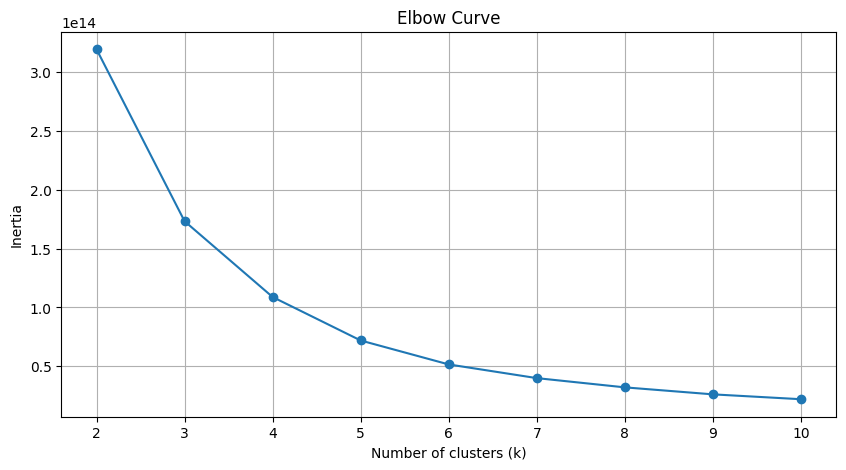

In [7]:

from sklearn import metrics

new_df=df[['vol_engine','price']]
# Assuming you have your data loaded in a variable named 'X'

# Initialize lists to store inertia values and silhouette scores
inertia_values = []
silhouette_scores = []

# Define the range of k values to try
k_values = range(2, 11)

# Calculate inertia and silhouette score for each value of k
for k in k_values:
    kmeans = kmclus(n_clusters=k, random_state=42)
    kmeans.fit(new_df)
    inertia_values.append(kmeans.inertia_)
    if k > 1:  # Silhouette score is not defined for k=1
        silhouette_scores.append(metrics.silhouette_score(new_df, kmeans.labels_))

# Plotting the Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



1. **Data Preparation:**
   - The code selects the 'vol_engine' and 'price' columns from the DataFrame `df` and creates a new DataFrame named `new_df`.

2. **K-means Clustering:**
   - The code initializes lists to store inertia values and silhouette scores for different values of k (number of clusters).
   - It defines a range of k values from 2 to 10.
   - For each value of k, K-means clustering is performed on the `new_df` data using the `kmclus` algorithm.
   - The inertia value (within-cluster sum of squares) is computed for each value of k and stored in the `inertia_values` list.
   - If k is greater than 1, the silhouette score is calculated using the `metrics.silhouette_score` function and stored in the `silhouette_scores` list.

3. **Elbow Curve:**
   - The inertia values for different values of k are plotted against the number of clusters (k) to visualize the "Elbow Curve".
   - The Elbow Curve helps in identifying the optimal number of clusters by looking for an "elbow point" where the rate of decrease in inertia slows down significantly.
   - The point where this significant decrease in inertia ceases can be considered as the optimal number of clusters.

4. **Analysis and Implications:**
   - The Elbow Curve indicates the trade-off between the number of clusters and the within-cluster sum of squares (inertia).
   - A smaller inertia suggests tighter clusters, but increasing the number of clusters tends to decrease inertia at the expense of interpretability and generalization.
   - The optimal number of clusters can be determined by identifying the "elbow" point in the curve, where the inertia begins to decrease at a slower rate.
   - In this case, the analyst should look for the point where adding more clusters does not significantly reduce the inertia, suggesting diminishing returns in terms of cluster separation.
   - The silhouette score complements the Elbow Curve by providing a measure of how well-separated the clusters are, with values closer to 1 indicating better separation.
   - Both the Elbow Curve and silhouette score help in making informed decisions about the appropriate number of clusters for the given dataset.
   - The analysis should be interpreted in the context of the specific problem domain and the desired balance between cluster interpretability and model complexity.

In summary, the code facilitates the exploration and determination of the optimal number of clusters using the Elbow Curve and silhouette score, providing valuable insights into the structure of the data.

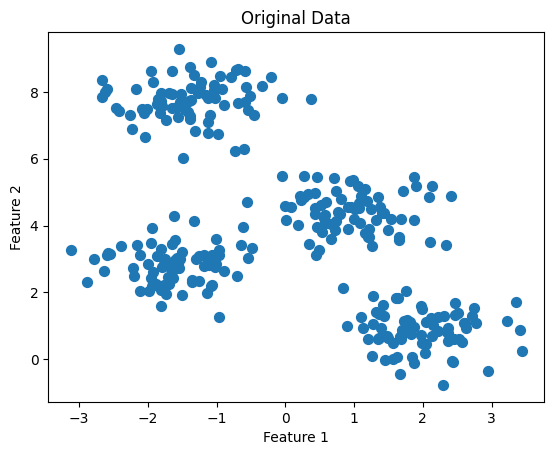

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


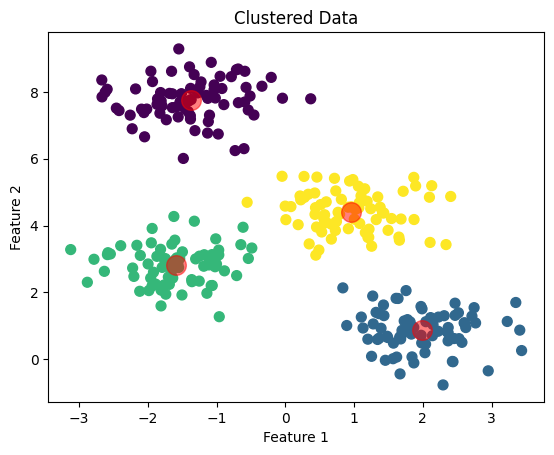

In [9]:


# Generating synthetic data
# You can replace this with your own dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()

# Applying K-means clustering
kmeans = kmclus(n_clusters=4)
kmeans.fit(X)

# Getting the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
plt.show()


1. **Generating Synthetic Data:**
   - The synthetic data is generated using the `make_blobs` function, which creates clusters of points with Gaussian distribution around specified centers.
   - In this case, 300 data points are generated with four clusters (`n_clusters=4`), each having a standard deviation of 0.60.

2. **Visualizing the Original Data:**
   - The scatter plot visualizes the original data points in two dimensions.
   - Each point represents a data instance, and the color of the points does not correspond to any clustering result.

3. **Applying K-means Clustering:**
   - K-means clustering is applied to the original data with `n_clusters=4`.
   - The algorithm iteratively assigns data points to the nearest cluster center and updates the cluster centers until convergence.

4. **Visualizing the Clustered Data:**
   - The scatter plot visualizes the clustered data points after applying K-means clustering.
   - Data points are colored based on their assigned cluster labels, and cluster centers are indicated by larger red points.

5. **Analysis and Implications:**
   - The clustering algorithm successfully partitions the data into four distinct clusters based on their proximity to each other.
   - Each cluster is represented by a cluster center, which serves as the centroid of the cluster.
   - The visualization of the clustered data helps in understanding the structure and distribution of the data.
   - K-means clustering is a simple and effective method for unsupervised learning and can be applied to various datasets for segmentation and pattern recognition tasks.
   - The choice of the number of clusters (`n_clusters`) is critical and should be determined based on domain knowledge or using techniques like the elbow method or silhouette score.
   - The clustered data can be further analyzed for insights or used as input for downstream machine learning tasks such as classification or anomaly detection.

In summary, the code demonstrates the process of applying K-means clustering to synthetic data, visualizing the clustering results, and highlights the importance of choosing appropriate parameters for effective clustering.

In [10]:


# Assuming you have your data loaded in a variable named 'X'

# Define the number of clusters (K)
k = 3

# Create a KMeans instance
kmeans = kmclus(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X)

# Retrieve the cluster centroids
centroids = kmeans.cluster_centers_

# Retrieve the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster centroids
print("Cluster centroids:")
print(centroids)

# Print the cluster labels for the first 10 data points
print("Cluster labels:")
print(labels[:10])


Cluster centroids:
[[-1.37324398  7.75368871]
 [ 1.98726097  0.90144281]
 [-0.33514647  3.62624134]]
Cluster labels:
[1 0 2 0 1 1 2 2 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



1. **Cluster Centroids:**
   - The cluster centroids represent the mean position of data points within each cluster.
   - In the output, we have three centroids, each defined by a pair of coordinates (x, y).
   - For instance, the centroid [1.98726097, 0.90144281] represents the center of one cluster.

2. **Cluster Labels:**
   - The cluster labels indicate which cluster each data point belongs to.
   - In the output, we see an array of cluster labels assigned to the first 10 data points.
   - For example, the first data point is assigned to cluster 1, the second to cluster 0, and so on.

3. **Analysis:**
   - The cluster centroids provide insights into the central tendencies of the clusters. They help visualize the spatial distribution of clusters in the feature space.
   - The cluster labels enable the segmentation of data points into distinct groups based on their proximity to cluster centroids.

4. **Implications:**
   - Understanding cluster centroids can assist in interpreting the characteristics and behavior of different clusters. For example, centroids with similar coordinates may indicate clusters with similar features.
   - Cluster labels allow for the classification of new data points into existing clusters, enabling predictive modeling and decision-making based on cluster membership.
   - The choice of the number of clusters (in this case, k=3) impacts the clustering results. Adjusting this parameter may lead to different cluster assignments and centroids, affecting the interpretation of the clustering outcome.

In summary, the code performs K-means clustering, providing cluster centroids and labels that offer valuable insights into the structure of the data. Analysis of cluster centroids and labels facilitates understanding the underlying patterns and relationships within the dataset, aiding in various applications such as customer segmentation, anomaly detection, and pattern recognition.

Inertia: 546.8911504626299
Silhouette Score: 0.5890390393551768


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

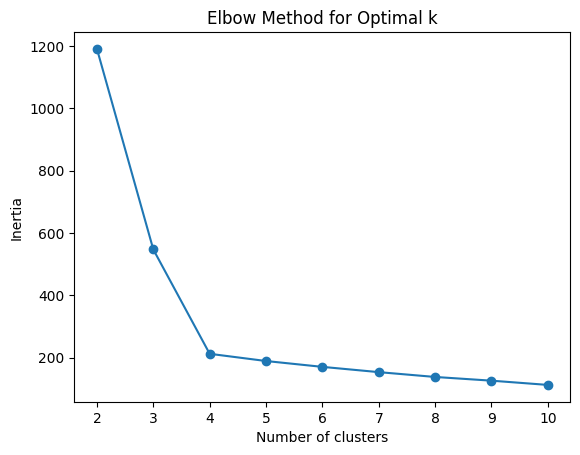

In [11]:


# Evaluate using inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Evaluate using silhouette score
silhouette_avg = sscore(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Plot the elbow curve
inertia_values = []
k_values = range(2, 11)  # Trying different number of clusters
for k in k_values:
    kmeans = kmclus(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




1. **Inertia:**
   - Inertia measures the sum of squared distances of data points to their closest cluster centroid.
   - A lower inertia value indicates that the data points are closer to the centroids of their respective clusters, implying tighter and more compact clusters.
   - In the provided code, the inertia value is 546.8911504626299, which represents the overall compactness of the clusters formed by the K-means algorithm.

2. **Silhouette Score:**
   - The silhouette score quantifies the quality of the clusters by measuring the distance between data points in the same cluster (cohesion) and the distance between data points in different clusters (separation).
   - The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters.
   - A silhouette score of 0.5890390393551768 suggests that the clusters are well-separated and distinct from each other.

3. **Elbow Curve:**
   - The elbow curve is a graphical tool used to determine the optimal number of clusters (k) for K-means clustering.
   - It plots the values of inertia against different values of k.
   - The "elbow point" in the curve, where the inertia starts to decrease at a slower rate, indicates the optimal number of clusters.
   - In the provided code, the elbow curve helps visualize the trade-off between the number of clusters and the inertia.

4. **Implications:**
   - The inertia and silhouette score provide quantitative measures to assess the performance of the K-means clustering algorithm.
   - A lower inertia and a higher silhouette score indicate better clustering results.
   - The elbow curve assists in selecting the optimal number of clusters by identifying the point where additional clusters no longer significantly reduce inertia.
   - Choosing the appropriate number of clusters is crucial for meaningful cluster interpretation and downstream analysis.

In summary, the code snippet offers insights into the effectiveness of K-means clustering on the dataset through inertia, silhouette score, and the elbow curve. These metrics aid in understanding the structure of the data and determining the optimal number of clusters for segmentation and pattern recognition tasks.